<a href="https://colab.research.google.com/github/JARACH-209/AI-ML_Lab/blob/master/ML_Lab9.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##Achal Dixit
1801007

In [75]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
import math
from sklearn.metrics import accuracy_score, confusion_matrix
%matplotlib inline

X,Y = load_iris(return_X_y=True)
df = pd.DataFrame(X)

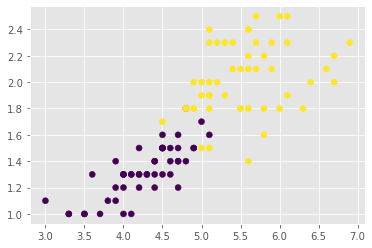

In [72]:
plt.style.use("ggplot")
plt.scatter(df[2][50:],df[3][50:],c=Y[50:])
# Versicolor and Virginica with features Petal Length and width
# Non-Linearly Separable 

In [2]:
df.drop(columns=[0,1],inplace = True)

In [3]:
# Taking only two classes and two features
X = df.iloc[50:].to_numpy()
Y = Y[50:]

In [ ]:
df_s = pd.DataFrame(X)
df_s.loc[df_s[1] == 1.5]    #point 56, 69, 79, 83, and 84 are causing problem 

In [5]:
df_s.drop(index = [56,69,79,83,84],inplace= True)
liers = [56,69,79,83,84]
Y = np.delete(Y,liers)

In [6]:
X = df_s.to_numpy()

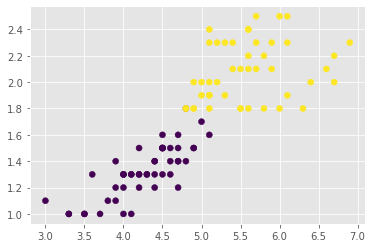

In [8]:
plt.style.use("ggplot")
plt.scatter(df_s[0],df_s[1],c=Y)
# Dataset is linearly separable

In [12]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

x_train, x_test,y_train,y_test = train_test_split(X,Y,test_size = 0.2)
scaler = StandardScaler().fit(x_train)
x_train = scaler.transform(x_train)
scaler = StandardScaler().fit(x_test)
x_test = scaler.transform(x_test)

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix

svc = SVC()
parameter =  {'kernel':('linear', 'rbf')}
clf = GridSearchCV(svc,parameter,cv = 5)  #5-fold CV
clf.fit(x_train,y_train)

In [108]:
y_pred = clf.predict(x_test)
matrix = confusion_matrix(y_test, y_pred)
class_acc = matrix.diagonal()/matrix.sum(axis=1)

In [109]:
print("Accuracy Overall \t\t%0.2f"%(accuracy_score(y_test,y_pred)*100))
print("Accuracy Class Versicolor \t%0.2f"%(class_acc[0]*100))
print("Accuracy Class Virginica \t%0.2f"%(class_acc[1]*100))

Accuracy Overall 		94.74
Accuracy Class Versicolor 	91.67
Accuracy Class Virginica 	100.00


RBFANN

In [10]:
import math
class K_Means():
    def __init__(self,k=1,iterations = 100,elbow=False,k_max=10):
        self.k = k
        self.iterations = iterations
        self.elbow_flag = elbow
        self.k_max = k_max
        self.best_k = None
        self.elbow_reductions = None
        self.k_centroids = None
        self.y = None
        self.variances = None

    def final_centroids(self):
        return np.array(self.k_centroids)

    def get_variance(self,X,y,k_centroids):
        # sum of squares of distances between points and their centroids
        temp = 0
        for j in range(len(k_centroids)):
            for point,cluster in zip(X,y):
                if cluster == j:
                    temp += self.euclidean_distance(point,k_centroids[j])**2 
        return math.sqrt(temp)

    def euclidean_distance(self, p1, p2):
        # math.dist can gives distance between points of any dimensionality 
        # Unfortunately Colab works on python3.6 and dist is in 3.8
        #return math.dist(p1,p2)     
        return np.linalg.norm(p1-p2)

    def get_centroids(self,X,y,k):
        k_centroids = []
        cluster_indexes = []
        for j in range(k):
            cluster_indexes.append([i for i in range(len(y)) if y[i] == j])
        # Finding means of all the clusters
        # Summing all the coordinates in all the dimensions having same cluster 
        # label and taking a mean
        for cluster in cluster_indexes:
            cluster_mean = 0
            for i in cluster:
                 cluster_mean += X[i]
            num = len(cluster) if len(cluster) >0 else 1
            k_centroids.append(np.array(cluster_mean/num))
            
            # k = number of clusters and their labels as well.
            # Taking mean of all the points having same cluster label 
            # To get the mean coordinates find the mean of all the dimensional coordinates
            # E.g -> [x,y,z] otherwise mean will be a number and for distance dims must be equal
            # experession below will give direct mean instead of coordinates.
        # k_centroids.append((np.mean([point for point,cluster in zip(X,y) if cluster == j])))
        return k_centroids

    def get_cluster(self,X,k_centroids):
        y = np.zeros(len(X),dtype=int)
        min_dist = None
        cluster = 0
        dist = None
        for i in range(len(X)):
            
            min_dist = self.euclidean_distance(X[i],k_centroids[0])
            cluster = 0
            for j in range(len(k_centroids)):
                dist = self.euclidean_distance(X[i],k_centroids[j])
                if dist < min_dist:
                    min_dist = dist
                    cluster = j
            y[i] = int(cluster)
        return y

    def clustering(self,X, k):
        min_variance = None
        variance = None
        best_centroids = None
        for i in range(self.iterations):
            y = np.zeros(len(X),dtype=int)
            k_centroids = []
            variance = []

            # intializes distinct random k points from dataset
            while True:
                rand_points = np.random.randint(len(X),size=(k))
                if len(set(rand_points)) == len(rand_points):
                    break
            for points in rand_points:
                k_centroids.append(X[points])
            min_variance = self.get_variance(X,y,k_centroids)
            check_count = 0
            # Clustering Loop
            while True:
                check_count += 1
                # Prevents the loop from going to infinity in any possible case
                if check_count > len(X)*10:
                    raise Exception("Error in Cluster Loop. Infite Looping. Run again.") 
                
                # cluster labeling with given centroids
                y = self.get_cluster(X,k_centroids) 
                
                # Generates new centroids by taking mean of all labels
                new_centroids = self.get_centroids(X,y,k)
                if np.array_equal(k_centroids,new_centroids):
                    variance = self.get_variance(X,y,new_centroids)
                    break
                else:
                    k_centroids = new_centroids

            variance = self.get_variance(X,y,new_centroids)
            if variance < min_variance:
                min_variance = variance
                best_centroids = k_centroids
        return best_centroids,min_variance

    def elbow_clustering(self,X):
        var_reductions = np.zeros(self.k_max+1)
        variance = None
        variances = []
        for i in range(1,int(self.k_max+1)):
            _, variance = self.clustering(X,i)
            variances.append(variance)
        for i in range(len(variances)-1):
            var_reductions[i+1] = abs(variances[i+1]-variances[i])
        self.elbow_reductions = var_reductions
        self.variances = variances
        return var_reductions
    
    def predict(self,X):
        y = self.get_cluster(X,self.k_centroids)
        return np.array(y).astype(int)

    def fit(self, X):
        best_k = None
        k = self.k
        centroids = []
        y = []
        if self.elbow_flag:

            #Gives variances for all the values of K
            #implement automation later
            self.elbow_clustering(X)

        else:
            centroids, min_var = self.clustering(X,k) #final centroids are stored globally
            y = self.get_cluster(X, centroids)
            self.k_centroids = centroids
            self.y = y
            return y
            


In [63]:
class RBFNN():
    def __init__(self):
        self.k_centroids = None
        self.hidden_layer = None
        self.weights = None
        self.sigma = None   #standard deviation

    def euclidean_distance(self,p1,p2):
        return np.linalg.norm(p1-p2)

    def convert_to_one_hot(self, y, num_of_classes):
        arr = np.zeros((len(y), num_of_classes))
        for i in range(len(y)):
            c = int(y[i])
            arr[i][c] = 1
        return arr
        
    def radial_basis_func(self,x,centre,s):
        distance = np.linalg.norm(x-centre)
        return 1 / np.exp(-distance / s ** 2)

    def get_rbf(self,X):
        RBF_list = []
        for x in X:
            RBF_list.append([self.radial_basis_func(x, c, s) for (c, s) in zip(self.k_centroids, self.sigma)])
        return np.array(RBF_list)
    
    def predict(self,X):
        RBF_list_tst = self.get_rbf(X)
        y_pred = None
        y_pred = RBF_list_tst @ self.weights
        y_pred = np.array([np.argmax(x) for x in y_pred])
        return y_pred

    def fit(self,X,Y,classes,centroids,std_deviation):
        self.k_centroids = centroids
        self.sigma = std_deviation
    
        self.hidden_layer = self.get_rbf(X)

        self.weights = np.linalg.pinv(self.hidden_layer.T @ self.hidden_layer) @ self.hidden_layer.T @ self.convert_to_one_hot(Y, classes)




In [68]:
clf = K_Means(k=3)
y_pred = clf.fit(x_train)
centroids = clf.k_centroids

In [69]:
centroids

[array([-1.08352401,  0.92603438, -1.41251102, -1.34033791]),
 array([0.96922479, 0.06777268, 0.85939539, 0.88272313]),
 array([-0.26579651, -0.99255735,  0.20354199,  0.10162204])]

In [70]:
c1,c2,c3 = [],[],[]
for x,y in zip(x_train,y_pred):
    if y==0:
        c1.append(x)
    if y==1:
        c2.append(x)
    else: c3.append(x)
standard_deviation = np.array([np.std(c1),np.std(c2),np.std(c3)])

In [71]:
rbf = RBFNN()
rbf.fit(X= x_train,Y= y_train,classes = 3,centroids = centroids,std_deviation = standard_deviation)

In [72]:
y_pred = rbf.predict(x_test)

In [77]:
matrix = confusion_matrix(y_test, y_pred)
class_acc = matrix.diagonal()/matrix.sum(axis=1)
print("Accuracy Overall \t\t%0.2f"%(accuracy_score(y_test,y_pred)*100))
print("Accuracy Class Versicolor \t%0.2f"%(class_acc[0]*100))
print("Accuracy Class Virginica \t%0.2f"%(class_acc[1]*100))

Accuracy Overall 		70.00
Accuracy Class Versicolor 	100.00
Accuracy Class Virginica 	40.00
